In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os 
import glob as gb
import cv2
import tensorflow as tf
import keras


In [2]:
trainPath =''
testPath =''
predPath = ''

In [3]:
for folder in os.listdir(trainPath + 'seg_train'):
    files = gb.glob(pathname = str(trainPath +'seg_train//' + folder +'/*.jpg') )
    print(f'for training data , found {len(files)} in folder {folder}')
    

for training data , found 2191 in folder buildings
for training data , found 2271 in folder forest
for training data , found 2404 in folder glacier
for training data , found 2512 in folder mountain
for training data , found 2274 in folder sea
for training data , found 2382 in folder street


In [4]:
for folder in os.listdir(testPath + 'seg_test'):
    Tfiles = gb.glob(pathname = str(testPath +'seg_test//' + folder +'/*.jpg') )
    print(f'for Test data , found {len(Tfiles)} in folder {folder}')
    

for Test data , found 437 in folder buildings
for Test data , found 474 in folder forest
for Test data , found 553 in folder glacier
for Test data , found 525 in folder mountain
for Test data , found 510 in folder sea
for Test data , found 501 in folder street


In [5]:

Pfiles = gb.glob(pathname = str(predPath +'seg_pred/*.jpg'))
print(f'for Prediction data , found {len(Pfiles)} ')

for Prediction data , found 7301 


In [6]:
#i=0
#for folder in os.listdir(testPath + 'seg_test'):
#    print (folder , i)
#    i+=1
    

In [7]:
code = {'buildings': 0 ,'forest': 1 , 'glacier': 2 , 'mountain': 3 , 'sea': 4 ,'street': 5}
def GetCode(n):
    for x , y in code.items():
        if(n==y):
            return x

In [8]:
size = []
for folder in os.listdir(trainPath + 'seg_train'):
    files = gb.glob(pathname = str(trainPath +'seg_train//' + folder +'/*.jpg') )
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()
#print(size)

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(144, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(134, 150, 3)        2
(136, 150, 3)        2
(108, 150, 3)        2
(105, 150, 3)        1
(97, 150, 3)         1
(131, 150, 3)        1
(147, 150, 3)        1
(81, 150, 3)         1
(145, 150, 3)        1
(141, 150, 3)        1
(100, 150, 3)        1
(103, 150, 3)        1
(76, 150, 3)         1
(120, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(124, 150, 3)        1
(110, 150, 3)        1
(149, 150, 3)        1
(140, 150, 3)        1
dtype: int64

In [9]:
size = []
for folder in os.listdir(testPath + 'seg_test'):
    Tfiles = gb.glob(pathname = str(testPath +'seg_test//' + folder +'/*.jpg') )
    for file in Tfiles:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(141, 150, 3)       1
(110, 150, 3)       1
(76, 150, 3)        1
(149, 150, 3)       1
(72, 150, 3)        1
(131, 150, 3)       1
(81, 150, 3)        1
dtype: int64

In [10]:
size = []
for file in Pfiles:
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(133, 150, 3)       1
(139, 150, 3)       1
(108, 150, 3)       1
(124, 150, 3)       1
(131, 150, 3)       1
(144, 150, 3)       1
(149, 150, 3)       1
(143, 150, 3)       1
(129, 150, 3)       1
(100, 150, 3)       1
(112, 150, 3)       1
(126, 150, 3)       1
(374, 500, 3)       1
dtype: int64

Reading Images

In [11]:
s = 100

In [12]:
x_train=[]
y_train=[]
for folder in os.listdir(trainPath + 'seg_train'):
    files = gb.glob(pathname = str(trainPath +'seg_train//' + folder +'/*.jpg') )
    for file in files:
        image = cv2.imread(file)
        image_array =cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])


In [13]:
print(f'we have {len(x_train)} items in x_train ')

we have 14034 items in x_train 


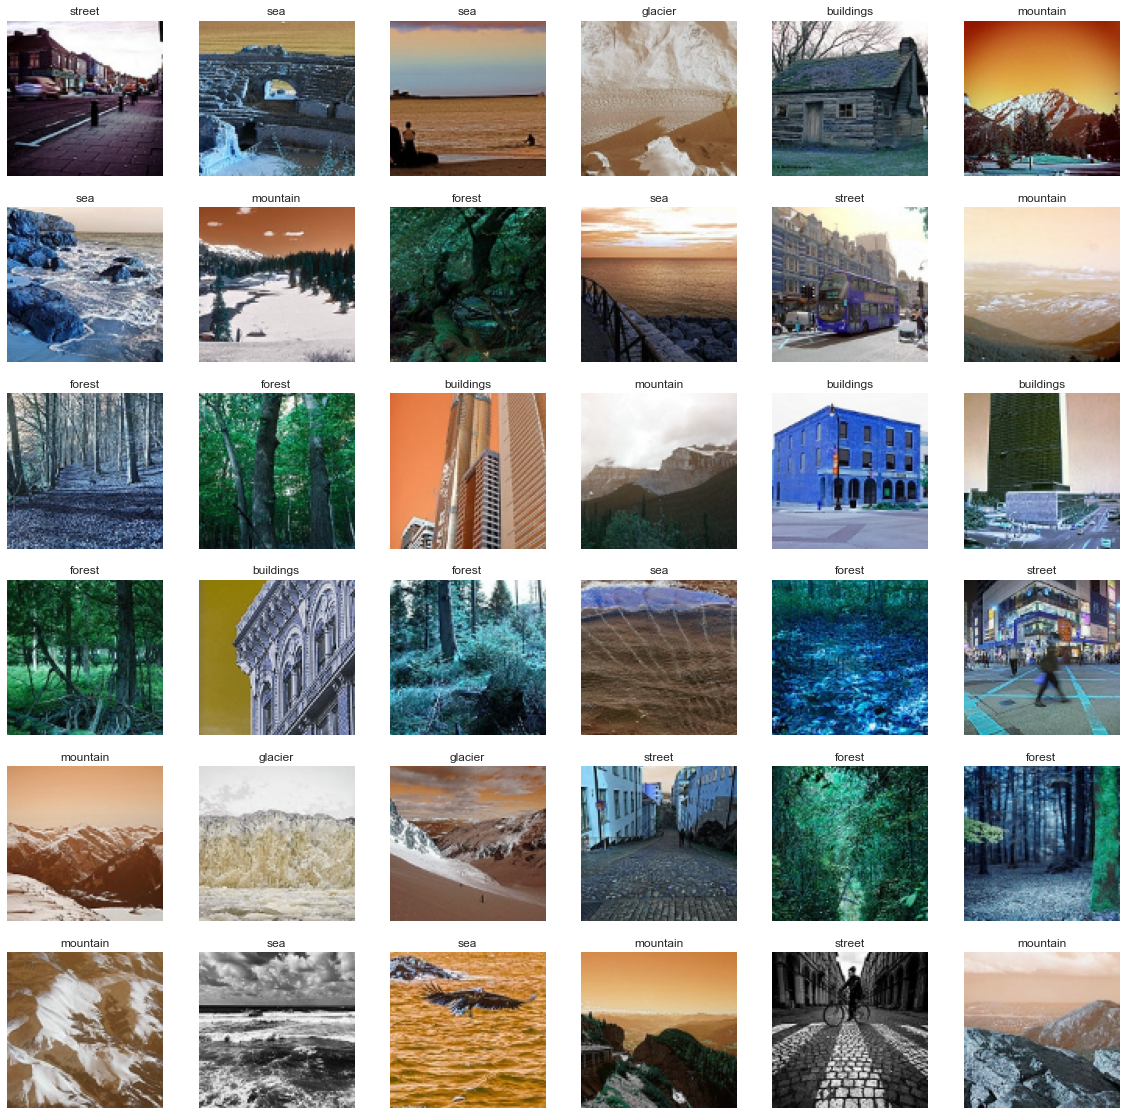

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])   
    plt.axis('off')
    plt.title(GetCode(y_train[i]))

In [15]:
x_test = []
y_test = []
for folder in  os.listdir(testPath +'seg_test') : 
    Tfiles = gb.glob(pathname= str(testPath + 'seg_test//' + folder + '/*.jpg'))
    for file in Tfiles: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_test.append(list(image_array))
        y_test.append(code[folder])
        

In [16]:
print(f'we have {len(x_test)} items in X_test')

we have 3000 items in X_test


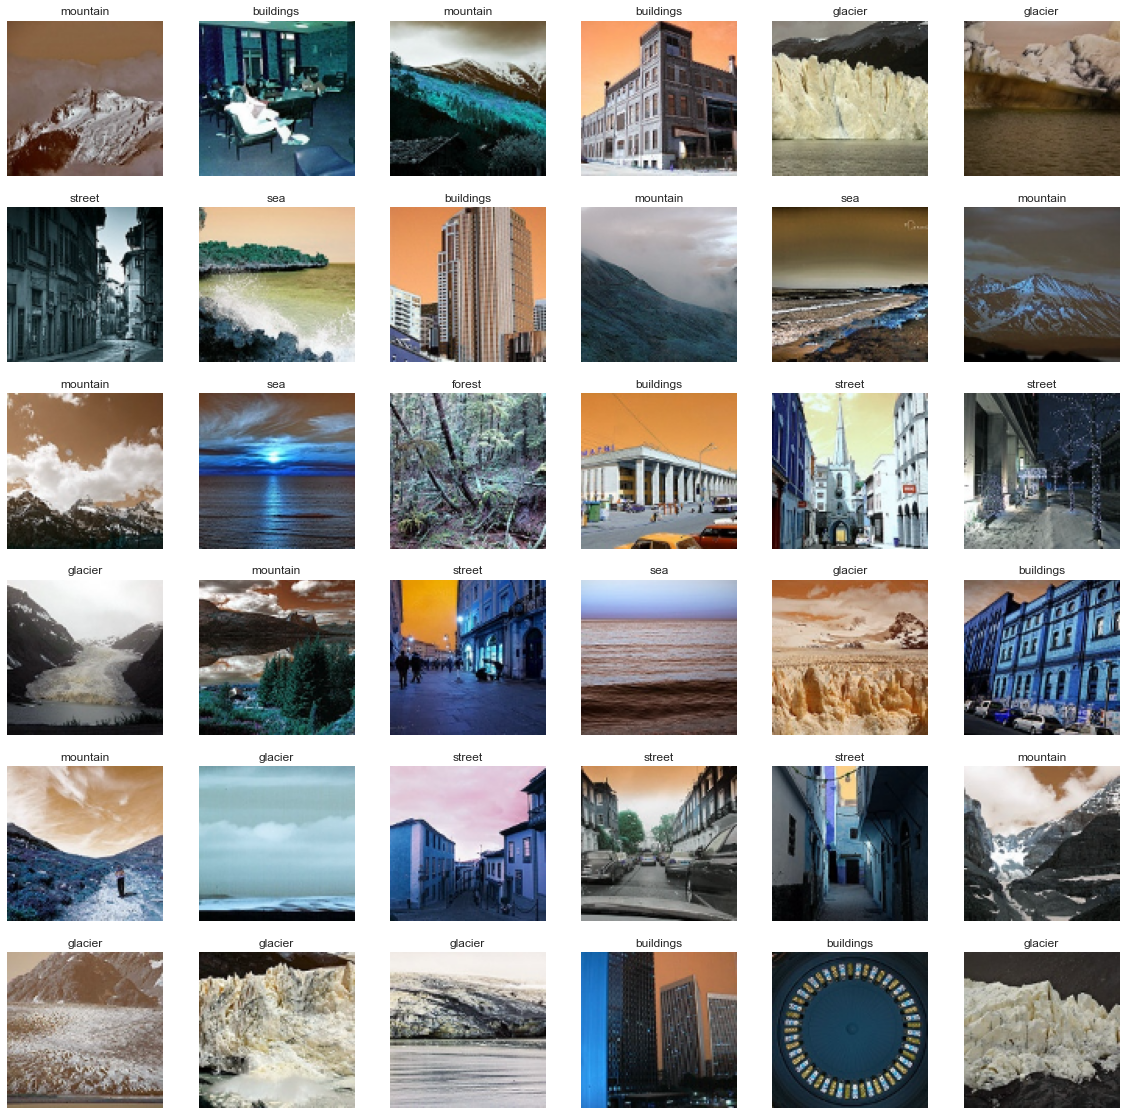

In [17]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])    
    plt.axis('off')
    plt.title(GetCode(y_test[i]))

In [18]:
X_pred = []
files = gb.glob(pathname= str(predPath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       

In [19]:
print(f'we have {len(X_pred)} items in X_pred')


we have 7301 items in X_pred


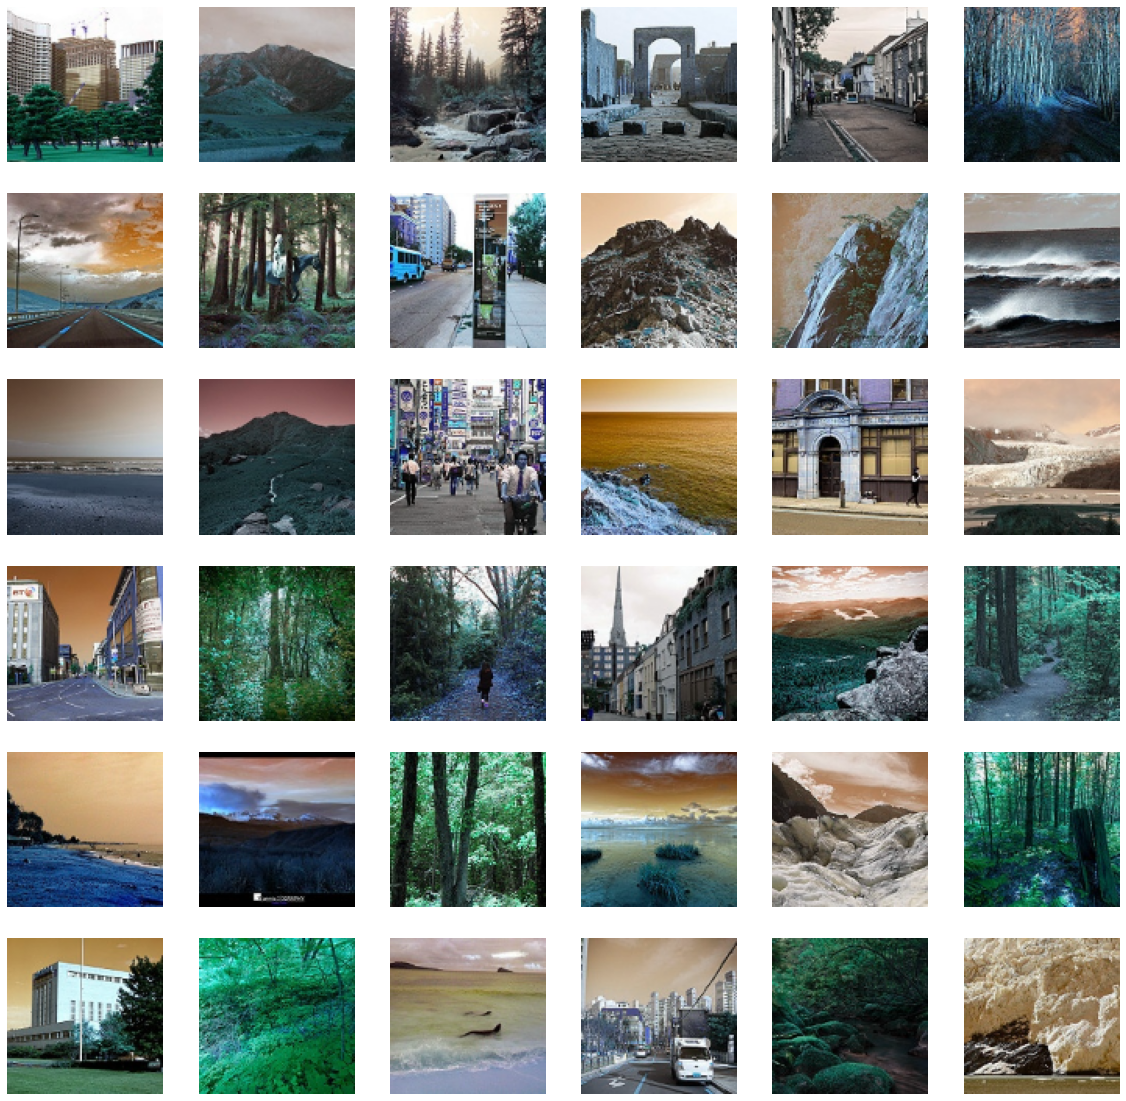

In [20]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

Building The Model

now we need to build the model to train our data

first to convert the data into arrays using numpy

In [21]:
X_train = np.array(x_train)
X_test = np.array(x_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


In [60]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(8,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(16,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
        keras.layers.MaxPool2D(6,6),
        keras.layers.Conv2D(12,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),    
        keras.layers.Conv2D(8,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),    
        keras.layers.Conv2D(6,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
        keras.layers.MaxPool2D(6,6),
        keras.layers.Flatten() ,    
        keras.layers.Dense(128,activation='relu') ,    
        keras.layers.Dense(64,activation='relu') ,    
        keras.layers.Dense(32,activation='relu') ,        
        keras.layers.Dropout(rate=0.2) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

now to compile the model , using adam optimizer , & sparse categorical crossentropy loss

In [61]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

so how the model looks like ?

In [62]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 100, 100, 8)       224       
                                                                 
 conv2d_65 (Conv2D)          (None, 100, 100, 16)      1168      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 12)        1740      
                                                                 
 conv2d_67 (Conv2D)          (None, 16, 16, 8)         872       
                                                                 
 conv2d_68 (Conv2D)          (None, 16, 16, 6)         438       
                                

In [63]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

Epoch 1/50
220/220 [==============================] - 51s 230ms/step - loss: 1.7890 - accuracy: 0.3052
Epoch 2/50
220/220 [==============================] - 51s 232ms/step - loss: 1.1703 - accuracy: 0.5033
Epoch 3/50
220/220 [==============================] - 52s 236ms/step - loss: 1.0340 - accuracy: 0.5890
Epoch 4/50
220/220 [==============================] - 52s 234ms/step - loss: 0.9580 - accuracy: 0.6287
Epoch 5/50
220/220 [==============================] - 52s 236ms/step - loss: 0.9061 - accuracy: 0.6460
Epoch 6/50
220/220 [==============================] - 52s 236ms/step - loss: 0.8581 - accuracy: 0.6712
Epoch 7/50
220/220 [==============================] - 52s 235ms/step - loss: 0.8357 - accuracy: 0.6754
Epoch 8/50
220/220 [==============================] - 53s 239ms/step - loss: 0.7939 - accuracy: 0.6960
Epoch 9/50
220/220 [==============================] - 52s 237ms/step - loss: 0.7708 - accuracy: 0.7117
Epoch 10/50
220/220 [==============================] - 52s 236ms/step - l

In [64]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

94/94 [==============================] - 3s 33ms/step - loss: 0.6494 - accuracy: 0.7950
Test Loss is 0.6494061946868896
Test Accuracy is 0.7950000166893005


In [65]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

94/94 [==============================] - 3s 30ms/step
Prediction Shape is (3000, 6)


In [66]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

229/229 [==============================] - 8s 35ms/step
Prediction Shape is (7301, 6)


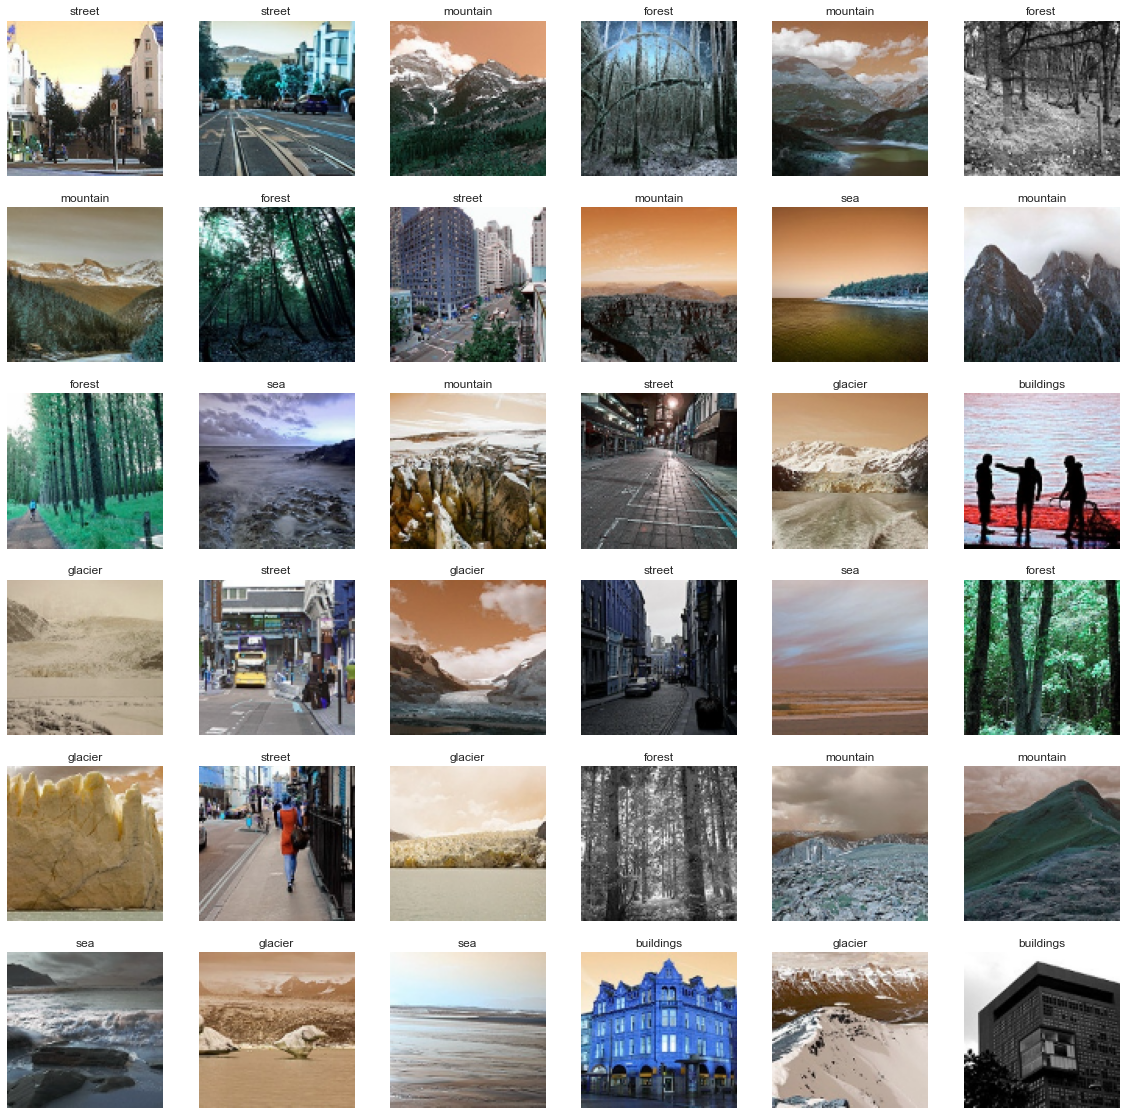

In [67]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(GetCode(np.argmax(y_result[i])))